## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
merge_df=pd.merge(mouse_metadata,study_results,how="outer")
# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice=len(merge_df["Mouse ID"].unique())
print(f"{num_mice} mice") #output number of mice

249 mice


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_list=merge_df.loc[(merge_df.duplicated(["Mouse ID","Timepoint"],False)==True)] #finds mice ids with duplicate timepoints
print(dup_list["Mouse ID"].unique()) #outputs the mouse id that has duplicate Timepoints

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_df.loc[(merge_df["Mouse ID"]) == "g989"] #outputs all data for the mouse id with duplicate timepoints

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.loc[(merge_df["Mouse ID"]) !="g989"]

In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean=len(clean_df["Mouse ID"].unique())
print(f"{num_mice_clean} mice") #output number of mice

248 mice


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#groups the data frame by Drug Regimen
drug_gb=clean_df.groupby("Drug Regimen")

#creates a dataframe with drug regimen as index and the first column as mean tumor volume
summ_stat_df=pd.DataFrame(drug_gb.mean()["Tumor Volume (mm3)"])
summ_stat_df=summ_stat_df.rename(columns={"Tumor Volume (mm3)":"Mean Tumor Volume"})#renames first column

#summarizes other columns
summ_stat_df["Mean Tumor Volume"]=round(summ_stat_df["Mean Tumor Volume"])
summ_stat_df["Median Tumor Volume"]=round(drug_gb.median()["Tumor Volume (mm3)"],2) #adds column for median tumor volume
summ_stat_df["Variance Tumor Volume"]=round(drug_gb.var()["Tumor Volume (mm3)"],2) #adds column for tumor volume variance
summ_stat_df["Standard Deviation Tumor Volume"]=round(drug_gb.std()["Tumor Volume (mm3)"],2) #adds column for tumor volume variance
summ_stat_df["SEM Tumor Volume"]=round(drug_gb.sem()["Tumor Volume (mm3)"],2) #adds column for standard error

#outputs data frame
summ_stat_df

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,41.0,41.56,24.95,4.99,0.33
Ceftamin,53.0,51.78,39.29,6.27,0.47
Infubinol,53.0,51.82,43.13,6.57,0.49
Ketapril,55.0,53.70,68.55,8.28,0.60
Naftisol,54.0,52.51,66.17,8.13,0.60
Placebo,54.0,52.29,61.17,7.82,0.58
Propriva,52.0,50.45,43.85,6.62,0.54
Ramicane,40.0,40.67,23.49,4.85,0.32
Stelasyn,54.0,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

drug_gb["Tumor Volume (mm3)"].agg(Mean_Tumor_Volume='mean',Median_Tumor_Volume='median',Variance_Tumor_Volume='var',Standard_Deviation_Tumor_Volume='std',SEM_Tumor_Volume='sem').round(2)

,Mean_Tumor_Volume,Median_Tumor_Volume,Variance_Tumor_Volume,Standard_Deviation_Tumor_Volume,SEM_Tumor_Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

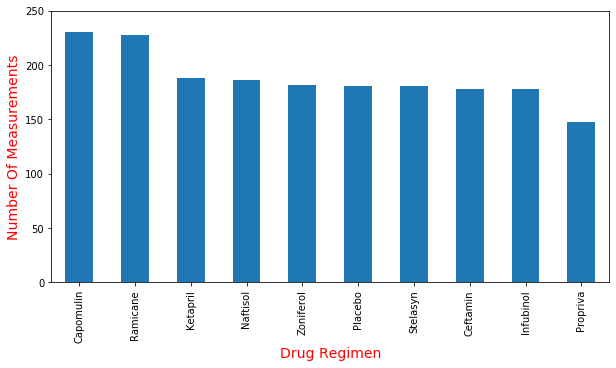

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_measure_num=clean_df["Drug Regimen"].value_counts() #calculates the number of measurements for each drug

drug_measure_num_graph=drug_measure_num.plot(kind="bar",figsize=(10,5)) #creates a bar graph with Drug Regimen and Number Of Measurements

#formats and labels graph
plt.ylim(0,drug_measure_num.max()+20) #formats the y limit
drug_measure_num_graph.set_xlabel("Drug Regimen",fontsize=14,color="red") 
drug_measure_num_graph.set_ylabel("Number Of Measurements",fontsize=14,color="red")

#outputs results
plt.show()
plt.tight_layout()

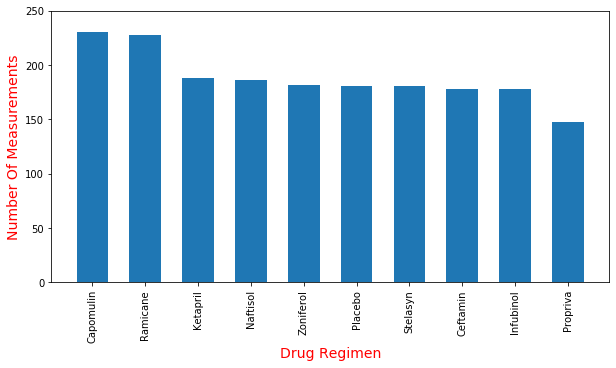

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis=np.arange(0,len(drug_measure_num),1) #sets the values for x axis
y_axis=drug_measure_num #assigns the values for the y_axis

plt.figure(figsize=(10,5))#sets the figure size

#sets the x ticks and names
x_name=drug_measure_num.index #finds the names to assign for x
x_ticks_location=[value for value in x_axis]  #finds the names to assign for x
plt.xticks(x_ticks_location,x_name,rotation=90)

#adds the x and y label
plt.xlabel("Drug Regimen",fontsize=14,color="red")
plt.ylabel("Number Of Measurements",fontsize=14,color="red")

#plots the graph
plt.bar(x_axis,y_axis,width=0.6)

#changes the y limit
plt.ylim(0,drug_measure_num.max()+20) #formats the y limit

#outputs the results
plt.show()
plt.tight_layout()

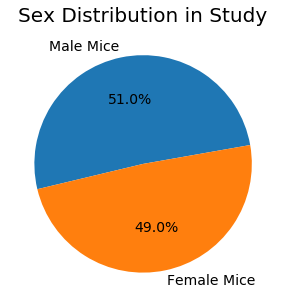

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_count=clean_df["Sex"].value_counts() #finds the value counts for sexes

#plots the distribution of sexes in pie graph
sex_graph=sex_count.plot(kind="pie",labels=["Male Mice","Female Mice"],figsize=(10,5),autopct="%1.1f%%",startangle=10,fontsize=14)

#adds a title for the graph
plt.title("Sex Distribution in Study",fontsize=20)
sex_graph.set_ylabel("")#removes the y label

#outputs graph
plt.show()

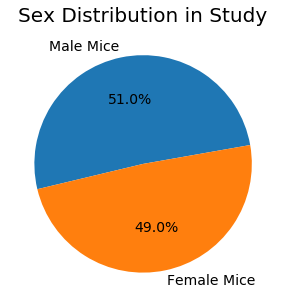

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count=clean_df["Sex"].value_counts() #finds the value counts for sexes

labels=["Male Mice", "Female Mice"] #sets the labels
plt.figure(figsize=(10,5)) #sets the figure size

#plots the graph
plt.pie(sex_count,labels=labels,autopct="%1.1f%%",startangle=10,textprops={'fontsize': 14})

#adds a graph title
plt.title("Sex Distribution in Study",fontsize=20)

#outputs the graph
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
clean_df.groupby("Mouse ID").max()['Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#clean_df.to_csv("test.csv")

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
